In [1]:
library(hdf5r)
library(Seurat)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)
library(DoubletFinder)
library(ggplot2)
library(ggpubr)
library(plyr)
library(pheatmap)

Attaching SeuratObject


载入程辑包：‘purrr’


The following object is masked from ‘package:hdf5r’:

    flatten_df



载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：Rcpp

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


载入程辑包：‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




In [2]:
monocyte = readRDS('~/HPV/res/public_rna/seurat_rds/monocyte.rds')

In [3]:
marker_genes = c('FCGR3A','CD14','VCAN')

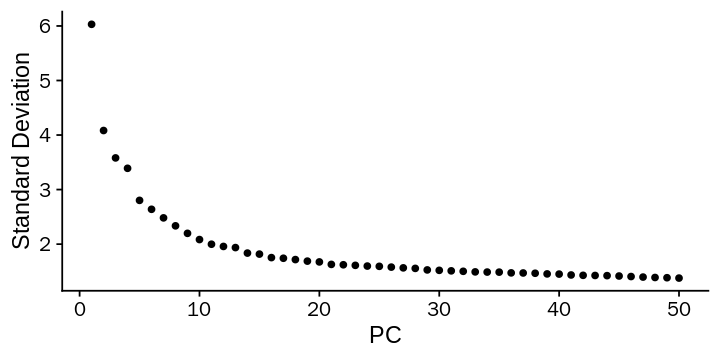

In [4]:
temp = monocyte
monocyte = CreateSeuratObject(counts = monocyte@assays$RNA@counts, project = "monocyte") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 500)
VariableFeatures(monocyte) = unique(c(marker_genes, monocyte@assays$RNA@var.features))
monocyte = ScaleData(monocyte, verbose = FALSE) %>% 
    RunPCA(npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(monocyte,ndims = 50)

In [5]:
monocyte@meta.data = temp@meta.data
monocyte = RunHarmony(monocyte, 'Patient', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:10, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:10, verbose = FALSE) %>%
    FindClusters(resolution = 0.1, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


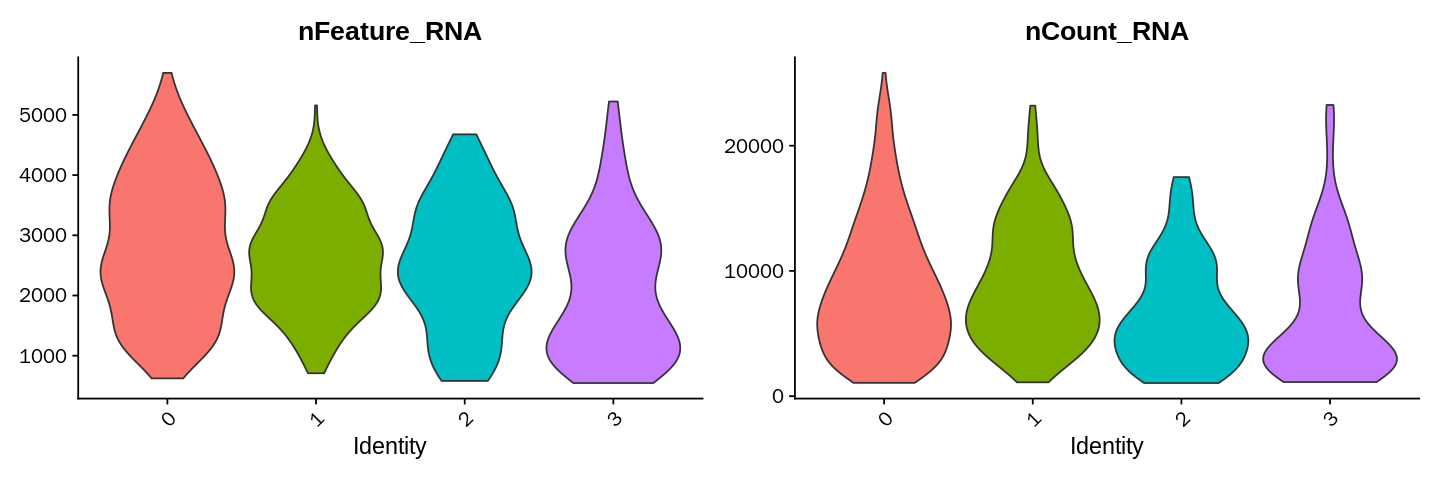

In [6]:
options(repr.plot.width = 12, repr.plot.height = 4)
VlnPlot(monocyte,features = c("nFeature_RNA", "nCount_RNA"),pt.size = 0)

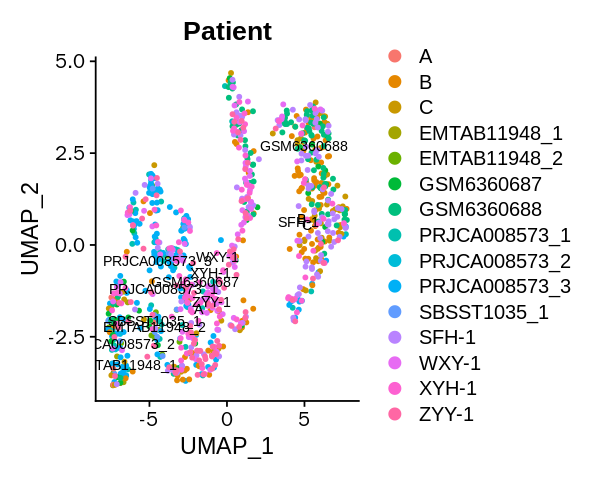

In [7]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(monocyte, group.by = 'Patient',label = TRUE,label.size = 3)

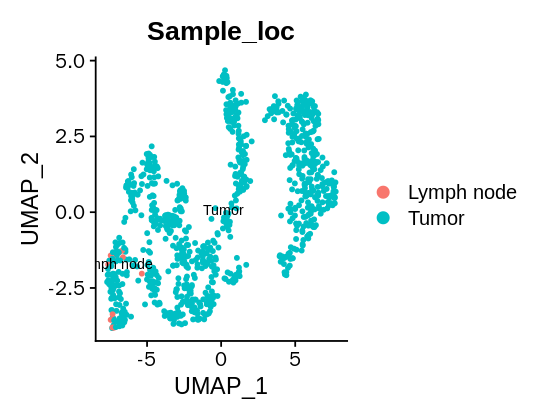

In [8]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(monocyte, group.by = 'Sample_loc',label = TRUE,label.size = 3)

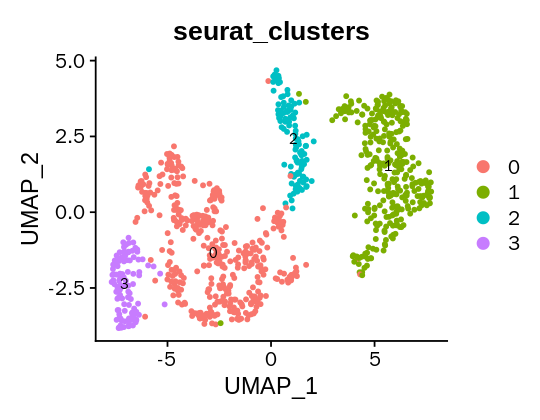

In [9]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(monocyte, group.by = 'seurat_clusters',label = TRUE,label.size = 3)

In [10]:
table(monocyte$seurat_clusters)


  0   1   2   3 
411 315 114 106 

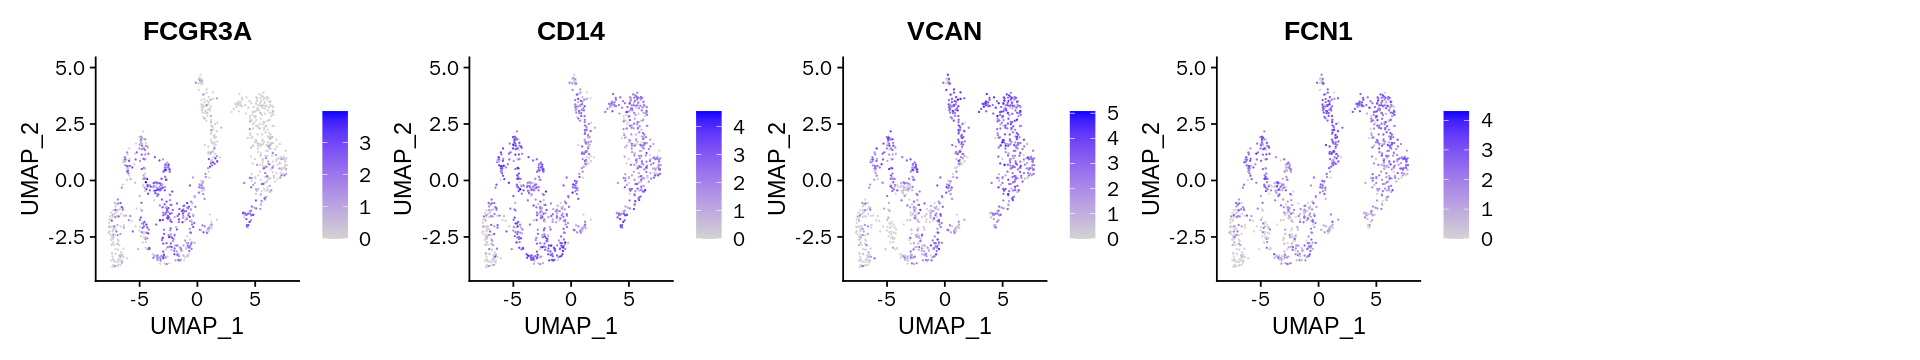

In [11]:
options(repr.plot.width = 16, repr.plot.height = 3)
FeaturePlot(monocyte,features = c(marker_genes,'FCN1'),ncol = 6,pt.size = 0.001)

In [12]:
monocyte$minor = 'monocyte'
monocyte$minor[monocyte$seurat_clusters %in% c('0')] = 'CD16Mono'
monocyte$minor[monocyte$seurat_clusters %in% c('1')] = 'CD14Mono_1'
monocyte$minor[monocyte$seurat_clusters %in% c('2')] = 'CD14Mono_2'
monocyte$minor[monocyte$seurat_clusters %in% c('3')] = 'others'

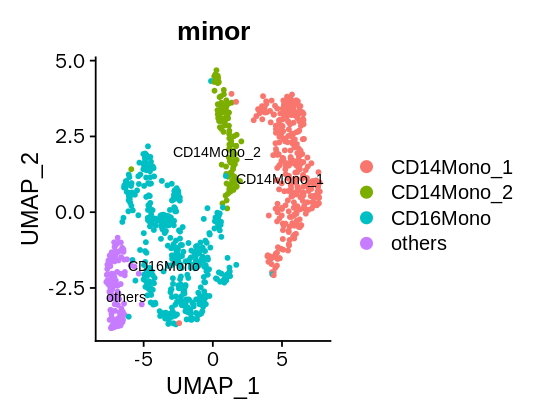

In [13]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(monocyte, group.by = 'minor',label = TRUE,label.size = 3,repel = TRUE)

In [14]:
saveRDS(monocyte,file = '~/HPV/res/public_rna/seurat_rds/monocyte.rds')